<a href="https://colab.research.google.com/github/iampragyagupta/Machine-Learning-Practice/blob/main/Regression_models_linear_stochastic_logistic_normalform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Batch Gradient Descent


```
# This is formatted as code
```



(100, 2)
[[4.48899691]
 [3.0049553 ]]


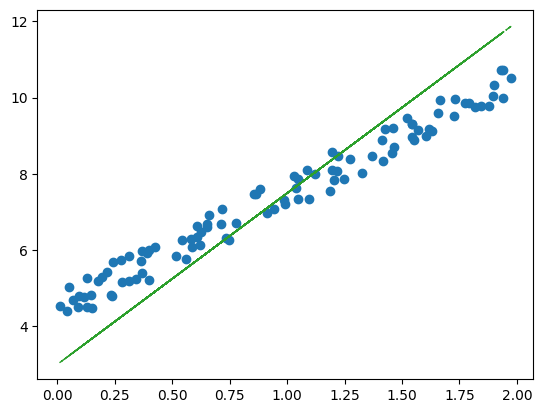

In [ ]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m =100               #instances
X = 2*np.random.rand(m,1) #vector
Y = 4 + 3*X +np.random.rand(m,1)
X_b = add_dummy_feature(X)  #adding bias term as 1 (x0)
m = len(X_b)
eta = 0.01            #learning rate
n_epochs = 1000
plt.plot(X,Y,'o')
plt.show

theta = np.random.rand(2,1) #random initialisation (2x1 since two weights needed)

for epoch in range (n_epochs):
  gradient = (2/m)*X_b.T @ (X_b @ theta -Y)
  theta = theta - eta*gradient
Y_predict = theta[0]*X_b + theta[1]
plt.plot(X_b, Y_predict,'-.',linewidth = 1)

print(X_b.shape)
print(theta)



for number of epochs and learning rate:
              10         0.1            Underfitting
              100        0.1            Underfitting (epochs are less)
              1000       0.1            Fit
              10000      0.1            Fit
              100        0.01           Underfitting (too low learning rate, doesn't converge in epochs)
              1000       0.01           Fit
              1000       0.5            Underfitting (too high step size)

**Stochastic Gradient Decent**

[[4.62514346]
 [2.89559701]]


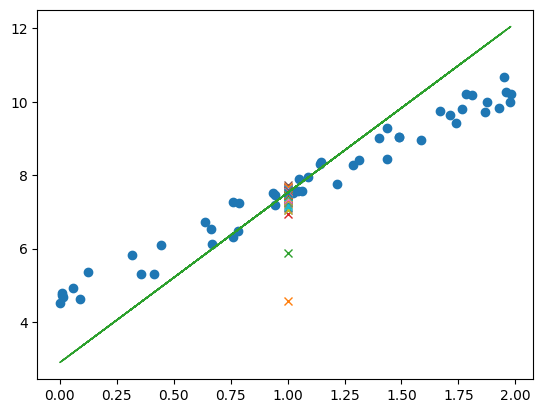

In [ ]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np
import matplotlib.pyplot as plt
m=50
X = 2*np.random.rand(m,1) #vector
Y = 4 + 3*X +np.random.rand(m,1)
X_b = add_dummy_feature(X)  #adding bias term as 1 (x0)
m = len(X_b)
n_epochs =50
t0,t1 = 5,50    #learning rate parameters

plt.plot(X,Y,'o')
plt.show

def learning_rate(t):
  return t0/(t+t1)    #updates and reduces learning rate with epochs

theta = np.random.randn(2,1)  #random initialization

x =[1]
for epoch in range(n_epochs):
  for i in range(m):
    #selecting random instance
    rand_index = np.random.randint(m)
    xi = X_b[rand_index: rand_index+1]
    yi = Y[rand_index: rand_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_rate(epoch*m+i)  #reducing learning rate every iteration
    theta = theta -eta*gradients
    y = theta[0]*x+theta[1]
    plt.plot(x,y,'x')


Y_predict = theta[0]*X_b + theta[1]
plt.plot(X_b, Y_predict,'-.',linewidth = 1)
print(theta)

for number of epochs and amount of data:
              50         100       Fit
              50         50        Fit
              50         30        Underfitting
              10         100       Underfitting
              (can clearly see it settles faster than BGD)
              (can clearly see value doesnt settle)

**Combination of BGD and SGD**

motivation: since SGD doesnt settle and BGD takes a lot of time, how abour we use a combination of the two if we want more accurate results

[[2.63504803]
 [4.03499285]]
[[4.46367993]
 [3.02730882]]


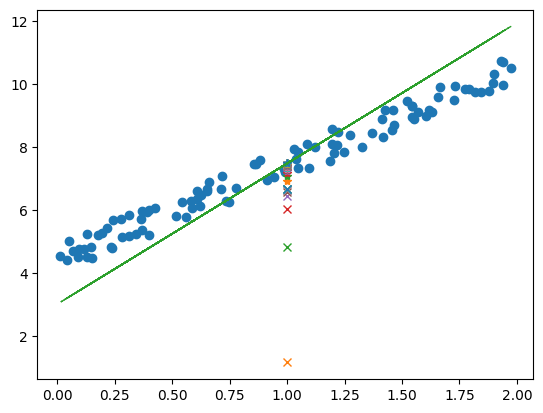

In [ ]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np
import matplotlib.pyplot as plt
m=100
X = 2*np.random.rand(m,1) #vector
Y = 4 + 3*X +np.random.rand(m,1)
X_b = add_dummy_feature(X)  #adding bias term as 1 (x0)
m = len(X_b)
n_epochs =30
t0,t1 = 5,50    #learning rate parameters

plt.plot(X,Y,'o')
plt.show

def learning_rate(t):
  return t0/(t+t1)    #updates and reduces learning rate with epochs

theta = np.random.randn(2,1)  #random initialization

x=[1]
for epoch in range(n_epochs):
  for i in range(m):
    #selecting random instance
    rand_index = np.random.randint(m)
    xi = X_b[rand_index: rand_index+1]
    yi = Y[rand_index: rand_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_rate(epoch*m+i)  #reducing learning rate every iteration
    theta = theta -eta*gradients
    np.random.seed(42)
    y = theta[0]*x+theta[1]
    plt.plot(x,y,'x')

print(theta)
eta = 0.1            #learning rate
n_epochs = 100

for epoch in range (n_epochs):
  gradient = (2/m)*X_b.T @ (X_b @ theta -Y)
  theta = theta - eta*gradient
  y = theta[0]*x+theta[1]
  plt.plot(x,y,'*')


Y_predict = theta[0]*X_b + theta[1]
plt.plot(X_b, Y_predict,'-.',linewidth = 1)
print(theta)

If accuracy and time is required, using SGD with BGD can be beneficial.
(however the accuracy was decent in this case, but for some case where accuracy is needed with a reduced runtime this can be a potential method)

**Normal Equation Using Scikit Learn**

[[4.49437563]
 [3.04133555]]


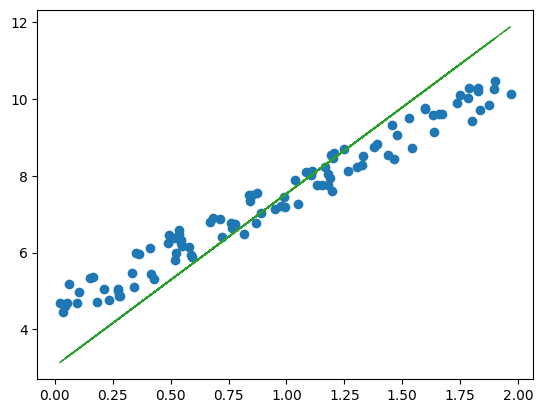

In [ ]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np
import matplotlib.pyplot as plt
m=100
X = 2*np.random.rand(m,1) #vector
Y = 4 + 3*X +np.random.rand(m,1)
X_b = add_dummy_feature(X)  #adding bias term as 1 (x0)

plt.plot(X,Y,'o')
plt.show
theta = np.linalg.inv(X_b.T@X_b)@X_b.T@Y
Y_predict = theta[0]*X_b + theta[1]
plt.plot(X_b, Y_predict,'-.',linewidth = 1)
print(theta)

**Logistic Regression**

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


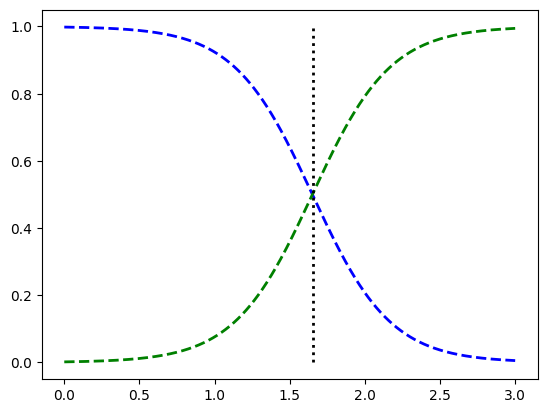

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
iris = load_iris(as_frame = True)
#print(list(iris))
#print(iris.data.head(5))
#print(iris.target.head(5))
X = iris.data[["petal width (cm)"]].values
Y= iris.target_names[iris.target] == 'virginica'    #classification for virginica
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42) #splitting into train and test sets (75/25) - no shuffling- random state for reproducibility
log_reg = LogisticRegression(random_state = 42)   #LogistiscReg has some randm instnces so random_state ensure same results are reproduced.
log_reg.fit(X_train, Y_train)
X_new=np.linspace(0,3,1000).reshape(-1,1)   #array of 1000 evenly spaced numbers between 0 and 3 - into a two-dimensional array with one column -1 to indicate size of array => 1000*1
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1]>=0.5][0,0]   #selects rows from X_new (boolean array that will be True where the probability of class 1 is greater than or equal to 0.5)
#[0, 0]: This indexing selects the first element of the array where the condition is True
plt.plot(X_new, y_proba[:,0], 'b--', linewidth = 2, label = "not virginica")
plt.plot(X_new, y_proba[:,1], 'g--', linewidth = 2, label = "virginica")
plt.plot([decision_boundary, decision_boundary],[0,1], "k:", linewidth = 2, label = "boundary")
plt.show()